# Importar librerias necesarias

In [1]:
import pandas as pd 
import numpy as np
import os

# Información sobre el dataset

Los datos de las columnas corresponden a: 
- Columna A: Año 
- Columna B: Mes 
- Columna C: Día 
- Columna D: Precipitación acumulada 
- Columna E: Temperatura máxima 
- Columna F: Temperatura mínima
- En las celdas donde aparece -99.9 significa que no hay información disponible para esa 
variable

# Cargando data

In [2]:
# Definimos el nombre de la subcarpeta y el archivo
subcarpeta = 'Dataset'
nombre_archivo = 'qc00000700.txt'

# Construimos el path completo al archivo
ruta_completa = os.path.join(os.getcwd(), subcarpeta, nombre_archivo)

# Utilizamos pandas para leer el archivo y pasarlo a un DataFrame
df = pd.read_csv(ruta_completa, sep=' ', header=None)

df.head(10)

,0,1,2,3,4,5
0,1965,1,1,0.0,33.8,17.2
1,1965,1,2,0.0,32.8,17.5
2,1965,1,3,0.0,32.0,16.0
3,1965,1,4,0.0,35.0,16.0
4,1965,1,5,0.0,32.0,18.0
5,1965,1,6,0.0,32.0,18.0
6,1965,1,7,0.0,33.6,17.5
7,1965,1,8,0.0,32.2,17.0
8,1965,1,9,0.0,31.0,21.0
9,1965,1,10,0.0,32.0,17.1


# Limpieza de datos

In [3]:
#Cambiar nombres de las columnas del dataframe
df.rename(columns= {0:"Año", 1:"Mes", 2:"Día", 3:"Precipitación acumulada",4:"Temperatura máxima", 5:"Temperatura mínima"}, inplace=True)

#Reemplazando valores -99.9 con NaN
df.replace(-99.9, np.nan, inplace=True)

#Visualizando las 5 primeras columnas
df.head()

,Año,Mes,Día,Precipitación acumulada,Temperatura máxima,Temperatura mínima
0,1965,1,1,0.0,33.8,17.2
1,1965,1,2,0.0,32.8,17.5
2,1965,1,3,0.0,32.0,16.0
3,1965,1,4,0.0,35.0,16.0
4,1965,1,5,0.0,32.0,18.0


In [4]:
#Creando una columna tipo str con la fecha
df["Fecha"] = df["Año"].astype(str)+ '-' +df["Mes"].astype(str)+ '-' +df["Día"].astype(str)

#Cambiando la columna creada a una tipo fecha
df["Fecha"] = pd.to_datetime(df["Fecha"])

#Visualizando las 5 primeras columnas
df.head()

,Año,Mes,Día,Precipitación acumulada,Temperatura máxima,Temperatura mínima,Fecha
0,1965,1,1,0.0,33.8,17.2,1965-01-01
1,1965,1,2,0.0,32.8,17.5,1965-01-02
2,1965,1,3,0.0,32.0,16.0,1965-01-03
3,1965,1,4,0.0,35.0,16.0,1965-01-04
4,1965,1,5,0.0,32.0,18.0,1965-01-05


In [5]:
#Visualizando valores vacios
for columna in df.columns:
    print( f"Los valores nulos de la columna {columna} es: " ,df[columna].isna().sum())

Los valores nulos de la columna Año es:  0
Los valores nulos de la columna Mes es:  0
Los valores nulos de la columna Día es:  0
Los valores nulos de la columna Precipitación acumulada es:  1317
Los valores nulos de la columna Temperatura máxima es:  1607
Los valores nulos de la columna Temperatura mínima es:  805
Los valores nulos de la columna Fecha es:  0


# Visualizando data

In [6]:
import matplotlib.pyplot as plt 
import seaborn as sns

In [8]:
df.columns

Index(['Año', 'Mes', 'Día', 'Precipitación acumulada', 'Temperatura máxima',
       'Temperatura mínima', 'Fecha'],
      dtype='object')

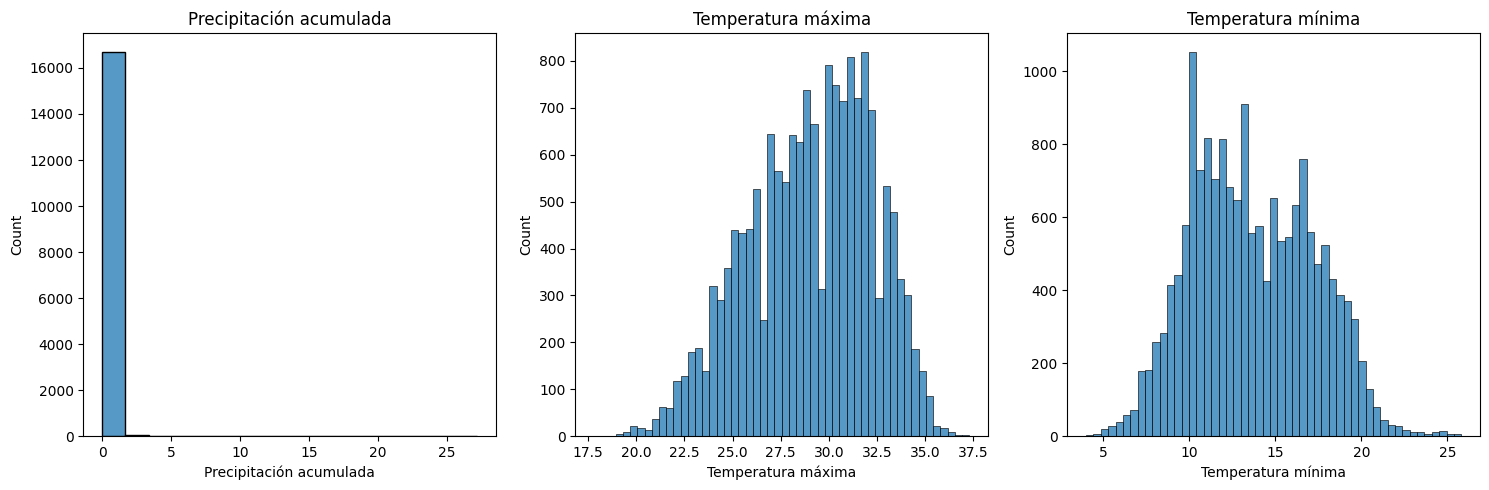

In [13]:
# Define the figure size
plt.figure(figsize=(15, 5))

# Lista de columna
columns = ['Precipitación acumulada', 'Temperatura máxima', 'Temperatura mínima']

# Recorre cada columna y traza el histograma
for i, columna in enumerate(columns):
    # Crear un subgrupo para cada histograma
    plt.subplot(1, len(columns), i + 1)  
    
    # Creando el grafico para cada columna
    sns.histplot(data=df, x=columna)
    
    # Agregando nombre del titlo
    plt.title(columna)

# Ajuste la disposición para evitar solapamientos
plt.tight_layout()  


plt.show()